# Montando ambiente

In [1]:
import mysql.connector
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
from keras.regularizers import l2


stop_words = set(stopwords.words('portuguese'))
nltk.download('punkt')

# Configuração da conexão com o banco
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "",
    "database": "graph_db"
}

"""Cria arestas com base em frases de exemplo."""
frases = [
        "Comece a gravação de áudio",
        "Salve esse texto importante",
        "Defina um alerta para amanhã",
        "Quero a gravação dessa reunião",
        "Salve a anotação rapidamente"
]

comandos = [
        "Nao encontrado",
        "Iniciar gravação",
        "Salvar texto",
        "Configurar alerta",
        "Salvar anotação"       
]

matriz_teste = [
    ["Dê início à captura de som", "Iniciar gravação"],
    ["Gostaria de ouvir isso depois", "Iniciar gravação"],
    ["Por gentileza, registre este momento", "Iniciar gravação"],
    ["Ative o modo gravação", "Iniciar gravação"],
    ["Preserve este áudio para mim", "Iniciar gravação"],
    ["Assegure que este texto esteja seguro", "Salvar texto"],
    ["Faça uma cópia deste conteúdo", "Salvar texto"],
    ["Deixe este texto registrado", "Salvar texto"],
    ["Fixe esta informação", "Salvar texto"],
    ["Quero ter este texto para depois", "Salvar texto"],
    ["Estabeleça um aviso para 19h", "Configurar alerta"],
    ["Preciso ser lembrado às 20h", "Configurar alerta"],
    ["Por favor, defina um bip para 21h", "Configurar alerta"],
    ["Quero um aviso sonoro para as 22h", "Configurar alerta"],
    ["Faça um lembrete vibrar às 23h", "Configurar alerta"],
    ["Gostaria de ter isso em minhas notas", "Salvar anotação"],
    ["Anote isto para mim", "Salvar anotação"],
    ["Mantenha esta informação como uma nota", "Salvar anotação"],
    ["Quero isto em formato de anotação", "Salvar anotação"],
    ["Por favor, transforme isso em uma nota", "Salvar anotação"]
]

matriz_teste += [
    ["Comece a documentar este som", "Iniciar gravação"],
    ["Acione a captação de áudio", "Iniciar gravação"],
    ["Vamos registrar esta conversa", "Iniciar gravação"],
    ["Por favor, dê partida na gravação", "Iniciar gravação"],
    ["Que tal começarmos a gravar?", "Iniciar gravação"],
    ["Vamos dar o play na gravação", "Iniciar gravação"],
    ["Inicie a captura de áudio agora", "Iniciar gravação"],
    ["Dê play na gravação", "Iniciar gravação"],
    ["Queira por gentileza, iniciar a gravação", "Iniciar gravação"],
    ["Hora de gravar, inicie!", "Iniciar gravação"],
    ["Gostaria que iniciasse a gravação", "Iniciar gravação"],
    ["Pode dar o start na gravação?", "Iniciar gravação"],
    ["Estou pronto, pode gravar", "Iniciar gravação"],
    ["Agora é a hora, comece a gravar", "Iniciar gravação"],
    ["Queira por favor, dar início à gravação", "Iniciar gravação"],
    ["Vamos capturar esta conversa?", "Iniciar gravação"],
    ["Gostaria que esta conversa fosse registrada", "Iniciar gravação"],
    ["Vamos guardar esta memória em áudio", "Iniciar gravação"],
    ["Inicie a gravação, estou pronto", "Iniciar gravação"],
    ["Vamos começar, inicie a gravação", "Iniciar gravação"]
]

matriz_teste += [
    ["Gostaria de manter este conteúdo", "Salvar texto"],
    ["Pode arquivar esta informação?", "Salvar texto"],
    ["Eu gostaria de registrar estas palavras", "Salvar texto"],
    ["Por favor, guarde este texto", "Salvar texto"],
    ["Desejo manter este trecho escrito", "Salvar texto"],
    ["Armazene este conteúdo, por favor", "Salvar texto"],
    ["Quero guardar este trecho", "Salvar texto"],
    ["Certifique-se de manter estas palavras", "Salvar texto"],
    ["Peço que arquive este texto", "Salvar texto"],
    ["Conservar este texto é importante", "Salvar texto"],
    ["Por favor, reserve este conteúdo", "Salvar texto"],
    ["Adicione este ao meu arquivo de textos", "Salvar texto"],
    ["Mantenha esta escrita", "Salvar texto"],
    ["Quero preservar estas palavras", "Salvar texto"],
    ["Pode fixar este texto?", "Salvar texto"],
    ["Gostaria de assegurar este conteúdo", "Salvar texto"],
    ["Por gentileza, registre estas palavras", "Salvar texto"],
    ["Vamos arquivar este trecho?", "Salvar texto"],
    ["Quero conservar este texto", "Salvar texto"],
    ["Estas palavras devem ser guardadas", "Salvar texto"],
    ["Eu peço que salve este conteúdo", "Salvar texto"],
    ["Não quero perder este texto, salve-o", "Salvar texto"],
    ["Gostaria que este trecho fosse armazenado", "Salvar texto"],
    ["Mantenha este conteúdo em arquivo", "Salvar texto"],
    ["Vamos assegurar a permanência deste texto", "Salvar texto"],
    ["Por favor, prenda este conteúdo", "Salvar texto"],
    ["Desejo reter estas palavras", "Salvar texto"],
    ["Preserve este trecho escrito", "Salvar texto"],
    ["Quero que este conteúdo seja retido", "Salvar texto"],
    ["Gostaria de fixar estas palavras", "Salvar texto"],
    ["É importante salvar este texto", "Salvar texto"],
    ["Estas palavras são valiosas, guarde-as", "Salvar texto"],
    ["Poderia manter este conteúdo?", "Salvar texto"],
    ["Desejo arquivar estas palavras", "Salvar texto"],
    ["Quero resguardar este trecho", "Salvar texto"],
    ["É crucial conservar este conteúdo", "Salvar texto"],
    ["Peço que fixe este texto", "Salvar texto"],
    ["Estas palavras são essenciais, salve-as", "Salvar texto"],
    ["Guarde este texto para mim", "Salvar texto"],
    ["Certifique-se de conservar estas palavras", "Salvar texto"],
    ["Mantenha este trecho seguro", "Salvar texto"],
    ["Preserve estas palavras para mim", "Salvar texto"],
    ["Estas linhas são importantes, arquive-as", "Salvar texto"],
    ["Desejo que este conteúdo seja registrado", "Salvar texto"],
    ["Por favor, assegure este texto", "Salvar texto"],
    ["Vamos reter este conteúdo?", "Salvar texto"],
    ["Por gentileza, conserve este trecho", "Salvar texto"],
    ["Peço que arquive estas palavras", "Salvar texto"],
    ["Este texto é valioso, salve-o", "Salvar texto"],
    ["Estas linhas são cruciais, preserve-as", "Salvar texto"],
    ["Mantenha este texto no arquivo", "Salvar texto"],
    ["Não deixe estas palavras se perderem, salve-as", "Salvar texto"],
    ["Por favor, prenda estas linhas", "Salvar texto"],
    ["Este trecho é fundamental, arquive-o", "Salvar texto"],
    ["Gostaria de segurar este conteúdo", "Salvar texto"],
    ["Não quero que estas palavras se percam", "Salvar texto"],
    ["Estas linhas merecem ser guardadas", "Salvar texto"],
    ["Assegure-se de reter este trecho", "Salvar texto"],
    ["Por gentileza, preserve este conteúdo", "Salvar texto"],
    ["Estas palavras têm importância, fixe-as", "Salvar texto"],
    ["Desejo que estas linhas sejam retidas", "Salvar texto"],
    ["Gostaria de segurar este texto", "Salvar texto"],
    ["Estas palavras devem ser preservadas", "Salvar texto"],
    ["Peço que conserve este trecho", "Salvar texto"],
    ["Quero ter certeza de que este texto será salvo", "Salvar texto"],
    ["Este conteúdo é valioso, retenha-o", "Salvar texto"],
    ["Estas linhas são essenciais, fixe-as", "Salvar texto"],
    ["Desejo manter este trecho seguro", "Salvar texto"],
    ["Por favor, reserve estas palavras", "Salvar texto"],
    ["Este texto é fundamental, preserve-o", "Salvar texto"],
    ["Quero garantir a segurança deste conteúdo", "Salvar texto"],
    ["Estas palavras são preciosas, arquive-as", "Salvar texto"],
    ["Por gentileza, segure este trecho", "Salvar texto"]
]


matriz_teste += [
    ["Defina um alerta para as 8h da manhã", "Configurar alerta"],
    ["Me lembre novamente às 10h30", "Configurar alerta"],
    ["Ative uma notificação para 12h45", "Configurar alerta"],
    ["Estabeleça um toque para 13h", "Configurar alerta"],
    ["Programe um aviso para as 14h", "Configurar alerta"],
    ["Quero ser notificado às 15h15", "Configurar alerta"],
    ["Ajuste um lembrete para as 16h", "Configurar alerta"],
    ["Configure um bip para as 17h", "Configurar alerta"],
    ["Me avise novamente às 18h30", "Configurar alerta"],
    ["Quero um alerta programado para as 19h15", "Configurar alerta"],
    ["Pode me chamar a atenção às 20h45?", "Configurar alerta"],
    ["Estou precisando de um alerta para 21h30", "Configurar alerta"],
    ["Quero ouvir um alarme às 22h15", "Configurar alerta"],
    ["Me lembre sobre o compromisso às 9h", "Configurar alerta"],
    ["Ajuste uma notificação para 10h", "Configurar alerta"],
    ["Por favor, defina um lembrete para 11h", "Configurar alerta"],
    ["Preciso ser avisado às 12h", "Configurar alerta"],
    ["Ative um alerta para 1h da tarde", "Configurar alerta"],
    ["Quero ser lembrado às 14h", "Configurar alerta"],
    ["Pode configurar uma notificação para 15h?", "Configurar alerta"],
    ["Defina um bip para as 3h30 da tarde", "Configurar alerta"],
    ["Preciso ser notificado às 16h45", "Configurar alerta"],
    ["Configure um alarme para as 18h", "Configurar alerta"],
    ["Por favor, me avise às 19h", "Configurar alerta"],
    ["Pode ajustar um alerta para 20h?", "Configurar alerta"],
    ["Quero ser lembrado às 21h", "Configurar alerta"],
    ["Ative um lembrete para 22h", "Configurar alerta"],
    ["Estabeleça um aviso para as 23h30", "Configurar alerta"],
    ["Preciso de um alerta para as 00h", "Configurar alerta"],
    ["Programe uma notificação para as 6h", "Configurar alerta"],
    ["Quero um bip para as 7h", "Configurar alerta"],
    ["Estou precisando de um lembrete para 8h", "Configurar alerta"],
    ["Ajuste um alarme para as 9h", "Configurar alerta"],
    ["Me avise sobre a reunião às 10h", "Configurar alerta"],
    ["Preciso ser alertado às 11h", "Configurar alerta"],
    ["Defina um aviso para 12h", "Configurar alerta"],
    ["Quero ser notificado sobre a chamada às 13h", "Configurar alerta"],
    ["Ative um lembrete para a consulta às 14h", "Configurar alerta"],
    ["Estabeleça um alerta para o compromisso às 15h", "Configurar alerta"],
    ["Me lembre sobre o evento às 16h", "Configurar alerta"],
    ["Pode programar um alerta para 17h?", "Configurar alerta"],
    ["Quero ser lembrado sobre o aniversário às 18h", "Configurar alerta"],
    ["Defina um aviso para a conferência às 19h", "Configurar alerta"],
    ["Ajuste um lembrete para o encontro às 20h", "Configurar alerta"],
    ["Preciso de uma notificação para a aula às 21h", "Configurar alerta"],
    ["Programe um bip para o treino às 22h", "Configurar alerta"],
    ["Configure um alarme para o jantar às 23h", "Configurar alerta"],
    ["Ative um alerta para o café da manhã às 7h", "Configurar alerta"],
    ["Estabeleça um lembrete para o almoço às 12h", "Configurar alerta"],
    ["Quero ser notificado sobre o brunch às 10h", "Configurar alerta"]
]

matriz_teste += [
    ["Anote isso para consulta futura", "Salvar anotação"],
    ["Guarde isso como uma referência", "Salvar anotação"],
    ["Isso é importante, anote por favor", "Salvar anotação"],
    ["Mantenha isso registrado", "Salvar anotação"],
    ["Eu vou querer revisar isso depois, salve", "Salvar anotação"],
    ["Isso pode ser útil, anote", "Salvar anotação"],
    ["Não quero esquecer isso, salve por favor", "Salvar anotação"],
    ["Grave essa informação", "Salvar anotação"],
    ["Isso é essencial, mantenha registrado", "Salvar anotação"],
    ["Pode adicionar isso às minhas anotações?", "Salvar anotação"],
    ["Preserve essa informação", "Salvar anotação"],
    ["Quero isso em minhas anotações", "Salvar anotação"],
    ["Isso é relevante, salve para mim", "Salvar anotação"],
    ["Guarde essa observação", "Salvar anotação"],
    ["Adicione isso à lista", "Salvar anotação"],
    ["Considere isso importante e salve", "Salvar anotação"],
    ["Essa informação é valiosa, anote", "Salvar anotação"],
    ["Eu vou precisar disso depois, adicione às anotações", "Salvar anotação"],
    ["Lembre-se disso para mim", "Salvar anotação"],
    ["Salve esse detalhe", "Salvar anotação"],
    ["Mantenha isso em nossos registros", "Salvar anotação"],
    ["Adicione isso ao caderno", "Salvar anotação"],
    ["Quero rever isso mais tarde, salve", "Salvar anotação"],
    ["Isso é crucial, mantenha anotado", "Salvar anotação"],
    ["Não deixe isso passar, anote", "Salvar anotação"],
    ["Inclua isso nas minhas notas", "Salvar anotação"],
    ["Anotou isso?", "Salvar anotação"],
    ["Essa é uma informação-chave, salve", "Salvar anotação"],
    ["Coloque isso na lista de anotações", "Salvar anotação"],
    ["Registre essa dica", "Salvar anotação"],
    ["Isso deve ser lembrado, anote", "Salvar anotação"],
    ["Mantenha isso em destaque nas anotações", "Salvar anotação"],
    ["Guarde essa sugestão", "Salvar anotação"],
    ["Essa ideia é boa, anote", "Salvar anotação"],
    ["Considere isso anotado?", "Salvar anotação"],
    ["Quero isso nos registros", "Salvar anotação"],
    ["Isso é um lembrete, salve", "Salvar anotação"],
    ["Não esqueça de anotar isso", "Salvar anotação"],
    ["Pode adicionar isso às observações?", "Salvar anotação"],
    ["Esse ponto é interessante, salve", "Salvar anotação"],
    ["Preciso que isso fique registrado", "Salvar anotação"],
    ["Isso é um insight, anote", "Salvar anotação"],
    ["Inclua isso em minhas anotações", "Salvar anotação"],
    ["Faça uma nota disso", "Salvar anotação"],
    ["Anotou essa parte?", "Salvar anotação"],
    ["Guarde esse pensamento", "Salvar anotação"],
    ["Mantenha isso em mente e anote", "Salvar anotação"],
    ["Adicione isso ao arquivo", "Salvar anotação"],
    ["Preciso que isso esteja em anotações", "Salvar anotação"],
    ["Considere essa informação e salve", "Salvar anotação"],
    ["Quero isso documentado", "Salvar anotação"],
    ["Isso é vital, salve nas anotações", "Salvar anotação"],
    ["Por favor, mantenha isso registrado para consulta", "Salvar anotação"],
    ["Guarde essa informação para depois", "Salvar anotação"],
    ["Esse é um bom ponto, anote", "Salvar anotação"],
    ["Vamos precisar disso, adicione às anotações", "Salvar anotação"],
    ["Essa reflexão é interessante, salve", "Salvar anotação"],
    ["Essa citação é boa, anote", "Salvar anotação"],
    ["Isso é fundamental, não esqueça de salvar", "Salvar anotação"],
    ["Coloque isso em nossas anotações", "Salvar anotação"],
    ["Mantenha isso guardado nas anotações", "Salvar anotação"],
    ["Essa é uma boa referência, anote", "Salvar anotação"],
    ["Isso pode ser relevante mais tarde, salve", "Salvar anotação"],
    ["Anote isso para futura referência", "Salvar anotação"],
    ["Acho que isso pode ser útil, salve", "Salvar anotação"],
    ["Adicione isso à nossa lista de notas", "Salvar anotação"],
    ["Lembre-se de registrar isso", "Salvar anotação"]
]



matriz_excessao = [  
    ["Arquive essa ideia na biblioteca mental.","Salvar anotação"]
]

matriz_excessao += [
    ["Dê início à captura de som", "Iniciar gravação"],
    ["Gostaria de ouvir isso depois", "Iniciar gravação"],
    ["Por gentileza, registre este momento", "Iniciar gravação"],
    ["Ative o modo gravação", "Iniciar gravação"],
    ["Preserve este áudio para mim", "Iniciar gravação"],
    ["Comece a registrar", "Iniciar gravação"],
    ["Vamos começar a gravar", "Iniciar gravação"],
    ["Ative o gravador", "Iniciar gravação"],
    
    ["Assegure que este texto esteja seguro", "Salvar texto"],
    ["Faça uma cópia deste conteúdo", "Salvar texto"],
    ["Deixe este texto registrado", "Salvar texto"],
    ["Fixe esta informação", "Salvar texto"],
    ["Quero ter este texto para depois", "Salvar texto"],
    ["Arquive este conteúdo", "Salvar texto"],
    ["Preserve estas palavras", "Salvar texto"],
    ["Mantenha este escrito", "Salvar texto"],
    
    ["Estabeleça um aviso para 19h", "Configurar alerta"],
    ["Preciso ser lembrado às 20h", "Configurar alerta"],
    ["Por favor, defina um bip para 21h", "Configurar alerta"],
    ["Quero um aviso sonoro para as 22h", "Configurar alerta"],
    ["Faça um lembrete vibrar às 23h", "Configurar alerta"],
    ["Defina uma notificação", "Configurar alerta"],
    ["Programe um lembrete", "Configurar alerta"],
    ["Marque um sinal", "Configurar alerta"],
    
    ["Gostaria de ter isso em minhas notas", "Salvar anotação"],
    ["Anote isto para mim", "Salvar anotação"],
    ["Mantenha esta informação como uma nota", "Salvar anotação"],
    ["Quero isto em formato de anotação", "Salvar anotação"],
    ["Por favor, transforme isso em uma nota", "Salvar anotação"],
    ["Arquive essa ideia na biblioteca mental", "Salvar anotação"],
    ["Ponha isso no arquivo de pensamentos", "Salvar anotação"],
    ["Capture esse comentário", "Salvar anotação"]
]


C:\Users\marcelo.maurin\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcelo.maurin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marcelo.maurin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Declara a funçao de conexao

In [2]:
def connect_to_database():
    """Retorna uma conexão com o banco de dados."""
    return mysql.connector.connect(**DB_CONFIG)

## Função Pega texto

In [3]:
def get_id(name, table):
    """Busca o ID de um item pelo nome, na tabela especificada."""
    connection = connect_to_database()
    cursor = connection.cursor()
    
    column = "word_name" if table == "words" else "command_name"
    query = f"SELECT * FROM {table} WHERE {column}=%s"
    cursor.execute(query, (name,))
    result = cursor.fetchone()
    
    cursor.close()
    connection.close()
    
    return result[0] if result else None

## Popula Arestas

In [4]:
def populaArestas(word1, word2, command):
    """Popula a tabela edges com as relações entre palavras e comando."""
    connection = connect_to_database()
    cursor = connection.cursor()
    
    word1_id = get_id(word1, 'words')
    word2_id = get_id(word2, 'words')
    command_id = get_id(command, 'commands')
    
    if not word1_id or not word2_id or not command_id:
        print(f"Erro: Palavras ou comando não encontrados: '{word1}', '{word2}', '{command}'")
        return
    
    insert_query = "INSERT INTO edges (word_id, command_id) VALUES (%s, %s)"
    
    # Inserindo relação da primeira palavra com o comando
    cursor.execute(insert_query, (word1_id, command_id))
    
    # Inserindo relação da segunda palavra com o comando
    cursor.execute(insert_query, (word2_id, command_id))
    
    connection.commit()
    cursor.close()
    connection.close()

## Cadastra Comandos

In [5]:
def cadastreCMD(command_name):
    """Cadastra um novo comando na tabela commands."""
    connection = connect_to_database()
    cursor = connection.cursor()
    
    insert_query = "INSERT INTO commands (command_name) VALUES (%s)"
    
    try:
        cursor.execute(insert_query, (command_name,))
        connection.commit()
    except mysql.connector.Error as err:
        print(f"Erro ao inserir comando '{command_name}': {err}")
    
    cursor.close()
    connection.close()

def ExemploCMD():   
    for cmd in comandos:
        cadastreCMD(cmd)

## Cadastra Palavras

In [6]:
# Função para cadastrar palavras
def CadastraWords(word_name):
    connection = connect_to_database()
    cursor = connection.cursor()
    
    # Verifica se a palavra já está cadastrada
    cursor.execute("SELECT word_id FROM words WHERE word_name = %s", (word_name,))
    result = cursor.fetchone()
    if result:
        return result[0]
    
    cursor.execute("INSERT INTO words (word_name) VALUES (%s)", (word_name,))
    connection.commit()
    word_id = cursor.lastrowid
    
    cursor.close()
    connection.close()
    
    return word_id


def ExemploWords():
  for frase in frases:
        palavras = frase.split() # Separa a frase em palavras individuais
        for palavra in palavras:
            # Ignoramos palavras muito comuns (stop words) e números
            if palavra.lower() not in stop_words and not palavra.isnumeric():
                CadastraWords(palavra)


## Cria Arestas

In [7]:
def get_id_words(value, column_name):
    """Retorna o ID associado a um valor em uma coluna e tabela específicos."""
    connection = connect_to_database()
    cursor = connection.cursor()

    select_query = f"SELECT word_id FROM words WHERE {column_name} = %s"
    cursor.execute(select_query, (value,))

    result = cursor.fetchone()
    cursor.close()
    connection.close()

    return result[0] if result else None

def get_id_commands(value, column_name):
    """Retorna o ID associado a um valor em uma coluna e tabela específicos."""
    connection = connect_to_database()
    cursor = connection.cursor()

    select_query = f"SELECT command_id FROM commands WHERE {column_name} = %s"
    cursor.execute(select_query, (value,))

    result = cursor.fetchone()
    cursor.close()
    connection.close()

    return result[0] if result else None


def CriaArestas(Word1, Word2, Cmd):
    print(Word1)
    print(Word2)
    """Cria uma aresta associando Word1 e Word2 ao comando Cmd."""
    #word1_id = get_id_words(Word1, "word_name")
    #word2_id = get_id_words(Word2, "word_name")
    word1_id = CadastraWords(Word1)
    word2_id = CadastraWords(Word2)
    cmd_id = get_id_commands(Cmd,  "command_name")

    print(word1_id);
    print(word2_id);
    print(cmd_id);

    if not word1_id or not word2_id or not cmd_id:
        print("Erro: Um ou mais valores não foram encontrados no banco de dados.")
        return

    connection = connect_to_database()
    cursor = connection.cursor()
    
    insert_query = """
    INSERT INTO edges (word_id1, word_id2, command_id)
    VALUES (%s, %s, %s)
    """
    
    try:
        cursor.execute(insert_query, (word1_id, word2_id, cmd_id))
        connection.commit()
    except mysql.connector.Error as err:
        print(f"Erro ao inserir aresta: {err}")
    
    cursor.close()
    connection.close()

## Exemplo Arestas

In [8]:
def ExemploAresta():
    for index, frase in enumerate(frases):
        palavras = [palavra for palavra in frase.split() if palavra.lower() not in stop_words and not palavra.isnumeric()]
        
        for i in range(len(palavras) - 1):
            # Criamos arestas entre palavras sequenciais e associamos a um comando
            CriaArestas(palavras[i], palavras[i+1], comandos[index])


# Juntando Tudo

In [9]:
connect_to_database()

#ExemploWords();

#ExemploCMD();

#ExemploAresta();

In [10]:
# Função para popular com dados de teste
def Popula_Teste():
    stop_words = set(stopwords.words('portuguese'))

    for item in matriz_teste:
        frase, comando = item
        words = word_tokenize(frase, language="portuguese")
        filtered_words = [w for w in words if w.lower() not in stop_words and w.isalpha()]

        for i in range(len(filtered_words) - 1):
            CriaArestas(filtered_words[i], filtered_words[i + 1], comando)


In [11]:
Popula_Teste()

Dê
início
58
59
5
início
captura
59
60
5
captura
som
60
61
5
Gostaria
ouvir
62
63
5
gentileza
registre
64
65
5
registre
momento
65
66
5
Ative
modo
67
68
5
modo
gravação
68
45
5
Preserve
áudio
69
46
5
áudio
mim
46
70
5
Assegure
texto
71
48
6
texto
seguro
48
72
6
Faça
cópia
73
74
6
cópia
deste
74
75
6
deste
conteúdo
75
76
6
Deixe
texto
77
48
6
texto
registrado
48
78
6
Fixe
informação
79
80
6
Quero
ter
53
81
6
ter
texto
81
48
6
Estabeleça
aviso
82
83
7
Preciso
lembrado
84
85
7
favor
defina
86
50
7
defina
bip
50
87
7
Quero
aviso
53
83
7
aviso
sonoro
83
88
7
Faça
lembrete
73
89
7
lembrete
vibrar
89
90
7
Gostaria
ter
62
81
8
ter
notas
81
91
8
Anote
mim
92
70
8
Mantenha
informação
93
80
8
informação
nota
80
94
8
Quero
formato
53
95
8
formato
anotação
95
56
8
favor
transforme
86
96
8
transforme
nota
96
94
8
Comece
documentar
44
97
5
documentar
som
97
61
5
Acione
captação
98
99
5
captação
áudio
99
46
5
Vamos
registrar
100
101
5
registrar
conversa
101
102
5
favor
dê
86
58
5
dê
partida
58
103
5
p

## Validação dos dados de teste

In [12]:
def Teste_Validacao(Frase, comando):
    stop_words = set(stopwords.words('portuguese'))
    connection = connect_to_database()
    cursor = connection.cursor()
    
    # Tokenize e limpe a frase
    words = word_tokenize(Frase, language="portuguese")
    filtered_words = [w.lower() for w in words if w.lower() not in stop_words and w.isalpha()]

    # Obtenha o ID do comando
    cursor.execute("SELECT command_id FROM commands WHERE command_name = %s", (comando,))
    command_id = cursor.fetchone()
    if not command_id:
        return "Comando não encontrado."
    command_id = command_id[0]

    # Verifique a presença de pares de palavras na tabela edges
    total_matches = 0
    for i in range(len(filtered_words) - 1):
        cursor.execute("""SELECT COUNT(*) FROM edges
                          WHERE word_id1 = (SELECT word_id FROM words WHERE word_name = %s)
                          AND word_id2 = (SELECT word_id FROM words WHERE word_name = %s)
                          AND command_id = %s""", (filtered_words[i], filtered_words[i + 1], command_id))
        total_matches += cursor.fetchone()[0]

    # Matriz de confusão: [Predicted True, Predicted False; Actual True, Actual False]
    confusion_matrix = [[0, 0], [0, 0]]
    if total_matches > 0:  # Se houver combinações, assuma que a previsão é verdadeira
        confusion_matrix[0][0] = 1
    else:  # Se não houver combinações, assuma que a previsão é falsa
        confusion_matrix[1][1] = 1

    cursor.close()
    connection.close()

    return confusion_matrix

In [13]:
def plot_confusion_matrix(confusion_matrix, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, cmap=cmap, fmt='g', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Comando verdadeiro')
    plt.xlabel('Comando previsto')
    plt.title(title)
    plt.show()

def Testa_Validacao():
    
    conn = connect_to_database()
    cursor = conn.cursor()
    
    # Lista de stopwords em português
    stop_words = set(stopwords.words('portuguese'))
    
    confusion_matrix = np.zeros((len(comandos), len(comandos)))

    for item in matriz_teste:
        frase, comando_verdadeiro = item
        
        # Processa a frase: remove stopwords, converte para minúsculo
        palavras = [word for word in frase.lower().split() if word not in stop_words and not word.isdigit()]

        # Encontre os IDs das palavras
        word_ids = []
        for palavra in palavras:
            cursor.execute("SELECT word_id FROM words WHERE word_name = %s", (palavra,))
            result = cursor.fetchone()
            if result:
                word_ids.append(result[0])

        # Encontre a aresta com maior frequência baseada nas palavras
        comando_previsto = None
        max_count = -1
        for i in range(len(word_ids)-1):
            cursor.execute("""
                SELECT command_id, COUNT(*) as freq
                FROM edges
                WHERE word_id1 = %s AND word_id2 = %s
                GROUP BY command_id
                ORDER BY freq DESC
                LIMIT 1
            """, (word_ids[i], word_ids[i+1]))
            result = cursor.fetchone()
            if result and result[1] > max_count:
                comando_previsto = result[0]
                max_count = result[1]
        
        if comando_previsto:
            # Converte o ID do comando para nome
            cursor.execute("SELECT command_name FROM commands WHERE command_id = %s", (comando_previsto,))
            result = cursor.fetchone()
            if result:
                comando_previsto_name = result[0]
                confusion_matrix[comandos.index(comando_verdadeiro)][comandos.index(comando_previsto_name)] += 1
        else:
            comando_previsto_name = comandos[0]
            confusion_matrix[comandos.index(comando_verdadeiro)][comandos.index(comando_previsto_name)] += 1
        
            

    conn.close()

    # Plota a matriz de confusão
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", xticklabels=comandos, yticklabels=comandos)
    plt.xlabel('Comando Previsto')
    plt.ylabel('Comando Verdadeiro')
    plt.show()


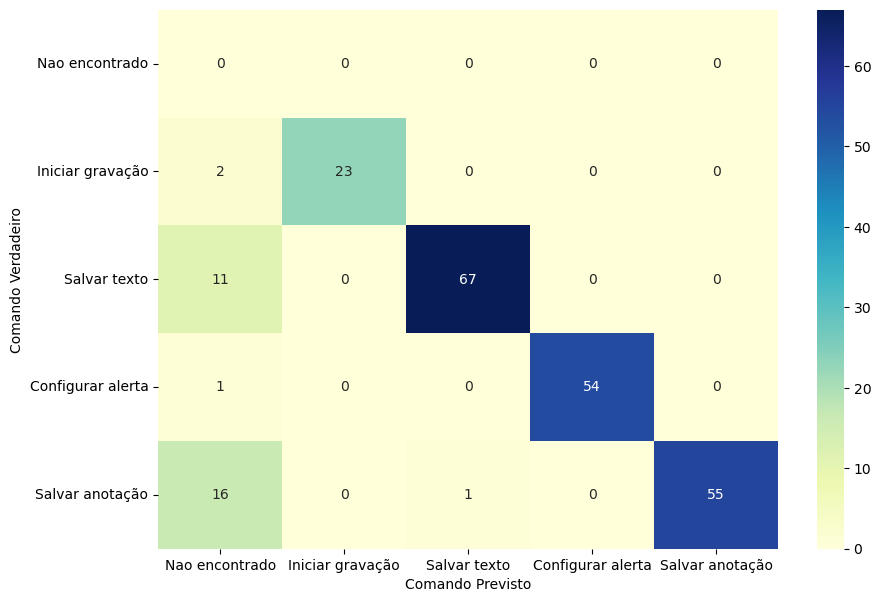

In [14]:
Testa_Validacao()

In [15]:
def Teste_Excessao():
    
    conn = connect_to_database()
    cursor = conn.cursor()
    
    # Lista de stopwords em português
    stop_words = set(stopwords.words('portuguese'))
    
    confusion_matrix = np.zeros((len(comandos), len(comandos)))

    for item in matriz_excessao:
        frase, comando_verdadeiro = item
        
        # Processa a frase: remove stopwords, converte para minúsculo
        palavras = [word for word in frase.lower().split() if word not in stop_words and not word.isdigit()]

        # Encontre os IDs das palavras
        word_ids = []
        for palavra in palavras:
            cursor.execute("SELECT word_id FROM words WHERE word_name = %s", (palavra,))
            result = cursor.fetchone()
            if result:
                word_ids.append(result[0])

        # Encontre a aresta com maior frequência baseada nas palavras
        comando_previsto = None
        max_count = -1
        for i in range(len(word_ids)-1):
            cursor.execute("""
                SELECT command_id, COUNT(*) as freq
                FROM edges
                WHERE word_id1 = %s AND word_id2 = %s
                GROUP BY command_id
                ORDER BY freq DESC
                LIMIT 1
            """, (word_ids[i], word_ids[i+1]))
            result = cursor.fetchone()
            if result and result[1] > max_count:
                comando_previsto = result[0]
                max_count = result[1]
        
        if comando_previsto:
            # Converte o ID do comando para nome
            cursor.execute("SELECT command_name FROM commands WHERE command_id = %s", (comando_previsto,))
            result = cursor.fetchone()
            if result:
                comando_previsto_name = result[0]
                confusion_matrix[comandos.index(comando_verdadeiro)][comandos.index(comando_previsto_name)] += 1
        else:
            comando_previsto_name = comandos[0]
            confusion_matrix[comandos.index(comando_verdadeiro)][comandos.index(comando_previsto_name)] += 1

    conn.close()

    # Plota a matriz de confusão
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", xticklabels=comandos, yticklabels=comandos)
    plt.xlabel('Comando Previsto')
    plt.ylabel('Comando Verdadeiro')
    plt.show()


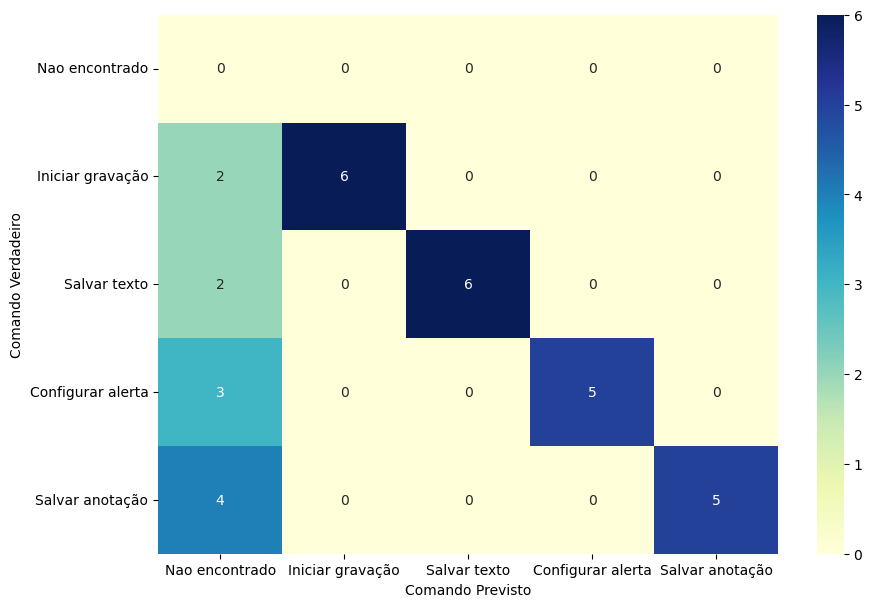

In [16]:
Teste_Excessao()